# <font color='red'>Customer Relationship Management - CRM case</font>

## Table of Contents

[1. Basic information](#1.-Basic-infos)

[2. Libraries](#2.-Libraries)

[3. Data](#3.-Data)

* [3.1 Data preparation](#3.1-Data-preparation)

* [3.2 Outliers](#3.2-Outliers)

[4. Distribution](#4.-Distribution)

[5. Basic statistics](#5.-Basic-statistics)

[6. Visualizations](#6.-Visualizations)

* [6.1 Sociodemographic](#6.1-Sociodemographic)

* [6.2 Amounts](#6.2-Amounts)

* [6.3 Purchases](#6.3-Purchases)

* [6.4 Accepted campaign](#6.4-Accepted-campaign)

[7. RFM model](#7.-RFM-model)

* [7.1 Recency](#7.1-Recency)

* [7.2 Frequency](#7.2-Frequency)

* [7.3 Monetary](#7.3-Monetary)

* [7.4 Score](#7.4-Score)

* [7.5 Visualizations](#7.5-Visualizations)

* [7.6 Numbers](#7.6-Numbers)

[8. Call To Action](#8.-Call-To-Action)

## 1. Basic infos
[Return to Table of Contents](#Table-of-Contents)

**Source:** https://github.com/ifood/ifood-data-business-analyst-test


**The Company:** Consider a well-established company operating in the retail food sector. Presently they have around
several hundred thousand registered customers and serve almost one million consumers a year.
They sell products from 5 major categories: wines, rare meat products, exotic fruits, specially
prepared fish and sweet products. These can further be divided into gold and regular products. The
customers can order and acquire products through 3 sales channels: physical stores, catalogs and
company’s website. Globally, the company had solid revenues and a healthy bottom line in the past
3 years, but the profit growth perspectives for the next 3 years are not promising... For this reason,
several strategic initiatives are being considered to invert this situation. One is to improve the
performance of marketing activities, with a special focus on marketing campaigns.


**The marketing department:** The marketing department was pressured to spend its annual budget more wisely. The CMO
perceives the importance of having a more quantitative approach when taking decisions, reason why
a small team of data scientists was hired with a clear objective in mind: to build a predictive model
which will support direct marketing initiatives. Desirably, the success of these activities will prove the
value of the approach and convince the more skeptical within the company.


**The objective:** The objective of the team is to build a predictive model that will produce the highest profit for the
next direct marketing campaign, scheduled for the next month. The new campaign, sixth, aims at
selling a new gadget to the Customer Database. To build the model, a pilot campaign involving 2.240
customers was carried out. The customers were selected at random and contacted by phone
regarding the acquisition of the gadget. During the following months, customers who bought the
offer were properly labeled. The total cost of the sample campaign was 6.720MU and the revenue
generated by the customers who accepted the offer was 3.674MU. Globally the campaign had a
profit of -3.046MU. The success rate of the campaign was 15%. The objective is of the team is to
develop a model that predicts customer behavior and to apply it to the rest of the customer base.
Hopefully, the model will allow the company to cherry pick the customers that are most likely to
purchase the offer while leaving out the non-respondents, making the next campaign highly
profitable. Moreover, other than maximizing the profit of the campaign, the CMO is interested in
understanding to study the characteristic features of those customers who are willing to buy the
gadget.


**The data:** The data set contains socio-demographic and firmographic features about 2.240 customers who
were contacted. Additionally, it contains a flag for those customers who responded the campaign,
by buying the product


**Description of each column:**

| Variables | Description | Data type |  
|:---|:---|:---|
| AcceptedCmp1 | 1 if costumer accepted the offer in the 1<sup>st</sup> campaign, 0 otherwise | Discrete |
| AcceptedCmp2 | 1 if costumer accepted the offer in the 2<sup>st</sup> campaign, 0 otherwise | Discrete |
| AcceptedCmp3 | 1 if costumer accepted the offer in the 3<sup>st</sup> campaign, 0 otherwise | Discrete |
| AcceptedCmp4 | 1 if costumer accepted the offer in the 4<sup>st</sup> campaign, 0 otherwise | Discrete |
| AcceptedCmp5 | 1 if costumer accepted the offer in the 5<sup>st</sup> campaign, 0 otherwise | Discrete |
| Response (target) | 1 if costumer accepted the offer in the last campaign, 0 otherwise | Discrete |
| Complain | 1 if costumer complained in the last 2 years | Discrete |
| DtCustomer | date of customer's enrollment with the company | Ordinal |
| Education | customer's level of education | Ordinal |
| Marital | customer's marital status | Nominal |
| Kidhome | number of small children in customer's household | Discrete |
| Teenhome | number of teenagers in customer's household | Discrete |
| Income | customer's yearly household income | Continuous |
| MntFishProducts | amount spent on fish products in the last 2 years | Discrete |
| MntMeatProducts | amount spent on meat products in the last 2 years | Discrete |
| MntFruits | amount spent on fruits in the last 2 years | Discrete |
| MntSweetProducts | amount spent on sweet products in the last 2 years | Discrete |
| MntWines | amount spent on wine in the last 2 years | Discrete |
| MntGoldProducts | amount spent on *gold* products in the last 2 years | Discrete |
| NumDealsPurchases | number of purchases made with discount | Discrete |
| NumCatalogPurchases | number of purchases made using catalog | Discrete |
| NumStorePurchases | number of purchases made directly in stores | Discrete |
| NumWebPurchases | number of purchases made through company's web site | Discrete |
| NumWebVisitsMonth | number of visits to company's web site in the last month | Discrete |
| Recency | number of days since the last purchase | Discrete |
| Year_Birth | year of birth | Discrete |
| Z_CostContact | cost contact | Discrete |
| Z_Revenue | revenue | Discrete |
| ID | client identification | Discrete |


## 2. Libraries
[Return to Table of Contents](#Table-of-Contents)

In [1]:
import pandas as pd # dataframe
import numpy as np # list
import seaborn as sns # graph
from matplotlib import pyplot as plt # plot
from scipy import stats # zscore

## 3. Data
[Return to Table of Contents](#Table-of-Contents)

In [2]:
# upload
data = pd.read_csv("data/ml_project1_data.csv")

In [3]:
# display all columns
pd.set_option('max_columns', None)

In [4]:
data.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
511,4320,1979,Graduation,Single,60152.0,0,1,2013-03-28,6,325,83,300,86,58,91,1,6,4,12,3,0,0,0,0,0,0,3,11,0
1115,4356,1971,Graduation,Together,71819.0,0,1,2013-08-28,70,1224,28,140,0,14,168,3,3,3,5,6,0,1,1,0,0,0,3,11,0
970,10981,1988,Graduation,Married,84219.0,0,0,2014-02-02,27,434,137,400,45,137,45,1,3,4,10,1,0,0,0,0,0,0,3,11,0
2079,10339,1954,Master,Together,NaN,0,1,2013-06-23,83,161,0,22,0,0,24,2,4,1,4,6,0,0,0,0,0,0,3,11,0
622,10972,1949,Graduation,Widow,72298.0,0,0,2014-03-10,52,625,35,169,58,17,35,1,4,3,6,1,0,1,1,0,0,0,3,11,0


In [5]:
print('The data has {} rows and {} columns.'.format(data.shape[0], data.shape[1]))

The data has 2240 rows and 29 columns.


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
# missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Income,24,0.010714
Response,0,0.000000
MntSweetProducts,0,0.000000
Year_Birth,0,0.000000
Education,0,0.000000
Marital_Status,0,0.000000
Kidhome,0,0.000000
Teenhome,0,0.000000
Dt_Customer,0,0.000000
Recency,0,0.000000


* There are null values only in variable 'Income'.

In [8]:
data['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [9]:
data['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [10]:
data['Kidhome'].unique()

array([0, 1, 2])

In [11]:
data['Teenhome'].unique()

array([0, 1, 2])

In [12]:
data['AcceptedCmp1'].unique()

array([0, 1])

In [13]:
data['AcceptedCmp2'].unique()

array([0, 1])

In [14]:
data['AcceptedCmp3'].unique()

array([0, 1])

In [15]:
data['AcceptedCmp4'].unique()

array([0, 1])

In [16]:
data['AcceptedCmp5'].unique()

array([0, 1])

In [17]:
data['Z_CostContact'].unique()

array([3])

In [18]:
data['Z_Revenue'].unique()

array([11])

In [19]:
data['Response'].unique()

array([1, 0])

### 3.1 Data preparation
[Return to Table of Contents](#Table-of-Contents)

In [20]:
# delete 'na' values
data_p = data.dropna()

# verify na values
data_p.isna().values.any()

False

In [21]:
# delete variables with a single value - does not add information
data_p = data_p.drop(['Z_CostContact','Z_Revenue'], axis=1)

In [22]:
print('The new data has {} rows and {} columns.'.format(data_p.shape[0], data_p.shape[1]))

The new data has 2216 rows and 27 columns.


### 3.2 Outliers
[Return to Table of Contents](#Table-of-Contents)

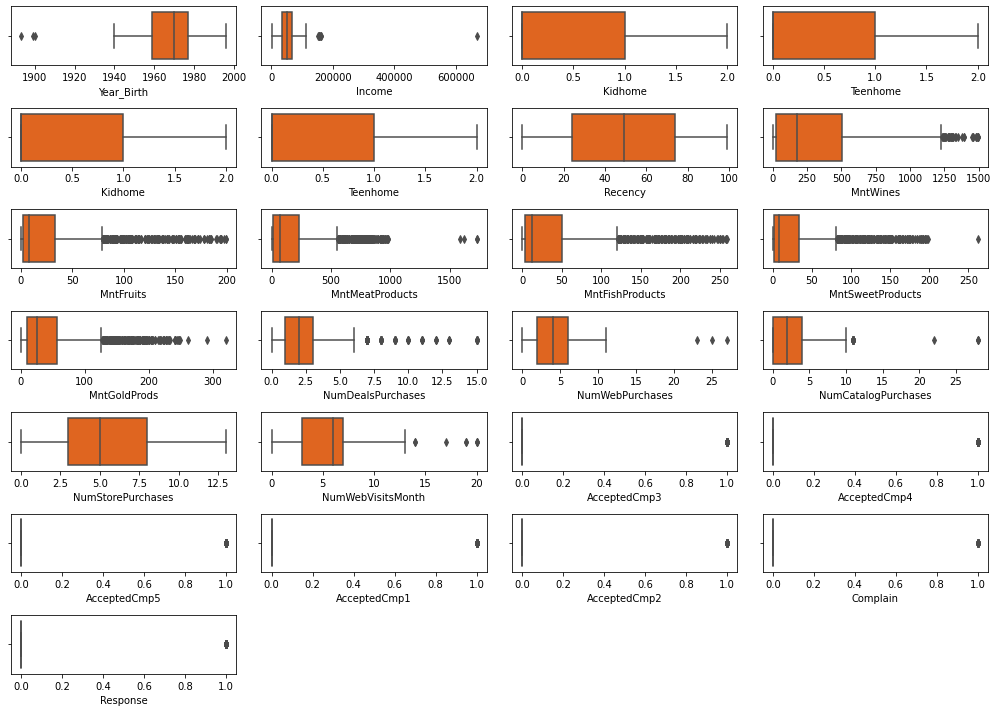

In [23]:
# boxplot to verify outliers

f, axes = plt.subplots(7, 4, figsize=(14, 10))
#sns.despine(left=True)

sns.boxplot(x=data_p['Year_Birth'], palette='hot', ax=axes[0, 0])
sns.boxplot(x=data_p['Income'], palette='hot', ax=axes[0, 1])
sns.boxplot(x=data_p['Kidhome'], palette='hot', ax=axes[0, 2])
sns.boxplot(x=data_p['Teenhome'], palette='hot', ax=axes[0, 3])
sns.boxplot(x=data_p['Kidhome'], palette='hot', ax=axes[1, 0])
sns.boxplot(x=data_p['Teenhome'], palette='hot', ax=axes[1, 1])
sns.boxplot(x=data_p['Recency'], palette='hot', ax=axes[1, 2])
sns.boxplot(x=data_p['MntWines'], palette='hot', ax=axes[1, 3])
sns.boxplot(x=data_p['MntFruits'], palette='hot', ax=axes[2, 0])
sns.boxplot(x=data_p['MntMeatProducts'], palette='hot', ax=axes[2, 1])
sns.boxplot(x=data_p['MntFishProducts'], palette='hot', ax=axes[2, 2])
sns.boxplot(x=data_p['MntSweetProducts'], palette='hot', ax=axes[2, 3])
sns.boxplot(x=data_p['MntGoldProds'], palette='hot', ax=axes[3, 0])
sns.boxplot(x=data_p['NumDealsPurchases'], palette='hot', ax=axes[3, 1])
sns.boxplot(x=data_p['NumWebPurchases'], palette='hot', ax=axes[3, 2])
sns.boxplot(x=data_p['NumCatalogPurchases'], palette='hot', ax=axes[3, 3])
sns.boxplot(x=data_p['NumStorePurchases'], palette='hot', ax=axes[4, 0])
sns.boxplot(x=data_p['NumWebVisitsMonth'], palette='hot', ax=axes[4, 1])
sns.boxplot(x=data_p['AcceptedCmp3'], palette='hot', ax=axes[4, 2])
sns.boxplot(x=data_p['AcceptedCmp4'], palette='hot', ax=axes[4, 3])
sns.boxplot(x=data_p['AcceptedCmp5'], palette='hot', ax=axes[5, 0])
sns.boxplot(x=data_p['AcceptedCmp1'], palette='hot', ax=axes[5, 1])
sns.boxplot(x=data_p['AcceptedCmp2'], palette='hot', ax=axes[5, 2])
sns.boxplot(x=data_p['Complain'], palette='hot', ax=axes[5, 3])
sns.boxplot(x=data_p['Response'], palette='hot', ax=axes[6, 0])

f.delaxes(ax=axes[6, 1])
f.delaxes(ax=axes[6, 2])
f.delaxes(ax=axes[6, 3])

#plt.setp(axes, yticks=[])
#plt.setp(axes, xticks=[])
plt.tight_layout()

* Year_Birth

In [24]:
outliers = data_p.query('Year_Birth < 1940')
outliers[['Year_Birth']]

,Year_Birth
192,1900
239,1893
339,1899


In [25]:
# find outliers above upper limit
def up_outliers(df, col):
    q1_support = df[col].quantile(.25)
    q3_support = df[col].quantile(.75)

    # Interquartile range
    iqr_support = q3_support - q1_support

    # Up limit
    upper = q3_support + 1.5 * iqr_support
    return upper

* Income

In [26]:
up_outliers(data_p, 'Income')

118350.5

In [27]:
outliers = data.query('Income > 118350.5')
outliers[['Income']].tail()

,Income
687,160803.0
1300,157733.0
1653,157146.0
2132,156924.0
2233,666666.0


* MntWines

In [28]:
up_outliers(data_p, 'MntWines')

1226.5

In [29]:
outliers = data.query('MntWines > 1226.5')
outliers[['MntWines']].tail()

,MntWines
1961,1462
1992,1276
2067,1245
2098,1486
2127,1311


* MntFruits

In [30]:
up_outliers(data_p, 'MntFruits')

79.5

In [31]:
outliers = data.query('MntFruits > 79.5')
outliers[['MntFruits']].tail()

,MntFruits
2185,142
2194,80
2203,124
2206,129
2217,194


* MntMeatProducts

In [32]:
up_outliers(data_p, 'MntMeatProducts')

556.625

In [33]:
outliers = data.query('MntMeatProducts > 556.625')
outliers[['MntMeatProducts']].tail()

,MntMeatProducts
2190,655
2193,845
2211,860
2213,631
2228,1607


* MntFishProducts

In [34]:
up_outliers(data_p, 'MntFishProducts')

120.5

In [35]:
outliers = data.query('MntFishProducts > 120.5')
outliers[['MntFishProducts']].tail()

,MntFishProducts
2188,199
2190,145
2193,202
2206,182
2217,149


* MntSweetProducts 

In [36]:
up_outliers(data_p, 'MntSweetProducts')

81.0

In [37]:
outliers = data.query('MntSweetProducts > 81.0')
outliers[['MntSweetProducts']].tail()

,MntSweetProducts
2175,92
2190,111
2193,133
2217,125
2235,118


* MntGoldProds

In [38]:
up_outliers(data_p, 'MntGoldProds')

126.5

In [39]:
outliers = data.query('MntGoldProds > 126.5')
outliers[['MntGoldProds']].tail()

,MntGoldProds
2178,227
2188,163
2194,174
2198,152
2235,247


* NumDealsPurchases

In [40]:
up_outliers(data_p, 'NumDealsPurchases')

6.0

In [41]:
outliers = data.query('NumDealsPurchases > 6.0')
outliers[['NumDealsPurchases']].tail()

,NumDealsPurchases
2090,7
2144,7
2198,7
2226,8
2236,7


* NumWebPurchases

In [42]:
up_outliers(data_p, 'NumWebPurchases')

12.0

In [43]:
outliers = data.query('NumWebPurchases > 12.0')
outliers[['NumWebPurchases']].tail()

,NumWebPurchases
27,27
1806,23
1898,27
1975,25


* NumCatalogPurchases

In [44]:
up_outliers(data_p, 'NumCatalogPurchases')

10.0

In [45]:
outliers = data.query('NumCatalogPurchases > 10.0')
outliers[['NumCatalogPurchases']].tail()

,NumCatalogPurchases
1745,11
1828,11
1906,11
1940,11
1958,11


* NumWebVisitsMonth

In [46]:
up_outliers(data_p, 'NumWebVisitsMonth')

13.0

In [47]:
outliers = data.query('NumWebVisitsMonth > 13.0')
outliers[['NumWebVisitsMonth']].tail()

,NumWebVisitsMonth
1042,19
1245,20
1328,17
1524,14
1846,19


In [48]:
# calculate z-score
cols = data_p.select_dtypes(include=np.number).columns.tolist()
cols = [x for x in cols if x not in ['ID','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Complain','Response']]
#cols.remove('ID','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Complain','Response')
#data_p_new[cols]
data_p_new = pd.DataFrame(data=data_p[cols])

# iterate over the remaining columns and create a new zscore column
for col in cols:
    col_zscore = col + '_zscore'
    data_p_new[col_zscore] = (data_p_new[col] - data_p_new[col].mean())/data_p_new[col].std()
    
data_p_new.sample(5)

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Year_Birth_zscore,Income_zscore,Kidhome_zscore,Teenhome_zscore,Recency_zscore,MntWines_zscore,MntFruits_zscore,MntMeatProducts_zscore,MntFishProducts_zscore,MntSweetProducts_zscore,MntGoldProds_zscore,NumDealsPurchases_zscore,NumWebPurchases_zscore,NumCatalogPurchases_zscore,NumStorePurchases_zscore,NumWebVisitsMonth_zscore
1700,1976,61064.0,0,1,80,387,126,342,0,45,180,5,8,4,11,6,0.599021,0.350245,-0.822854,0.908861,1.070436,0.242815,2.504000,0.780281,-0.687419,0.437551,2.625372,1.391289,1.428231,0.454080,1.599308,0.280765
2089,1971,34109.0,0,1,39,9,1,5,2,1,4,1,0,0,3,4,0.181852,-0.720542,-0.822854,0.908861,-0.345879,-0.877756,-0.637184,-0.722283,-0.650891,-0.633737,-0.771300,-0.688021,-1.490464,-0.912631,-0.861636,-0.543855
378,1961,66426.0,0,1,14,1043,24,97,32,24,157,2,3,5,10,6,-0.652485,0.563251,-0.822854,0.908861,-1.209486,2.187511,-0.059206,-0.312087,-0.102967,-0.073746,2.181489,-0.168193,-0.395953,0.795758,1.291690,0.280765
188,1976,74068.0,0,0,14,783,30,537,140,76,15,1,4,10,9,2,0.599021,0.866829,-0.822854,-0.928763,-1.209486,1.416747,0.091571,1.649718,1.869561,1.192322,-0.559008,-0.688021,-0.031117,2.504147,0.984072,-1.368475
1612,1990,64509.0,0,0,19,836,185,575,24,25,77,1,6,3,9,4,1.767094,0.487098,-0.822854,-0.928763,-1.036765,1.573864,3.986638,1.819146,-0.249080,-0.049398,0.637547,-0.688021,0.698557,0.112402,0.984072,-0.543855


In [49]:
# select rows: z-score <= 3.5
data_p = data_p[(np.abs(stats.zscore(data_p_new)) <= 3.5).all(axis=1)].copy()

In [50]:
print('The new data has {} rows and {} columns.'.format(data_p.shape[0], data_p.shape[1]))

The new data has 2079 rows and 27 columns.


## 4. Distribution
[Return to Table of Contents](#Table-of-Contents)

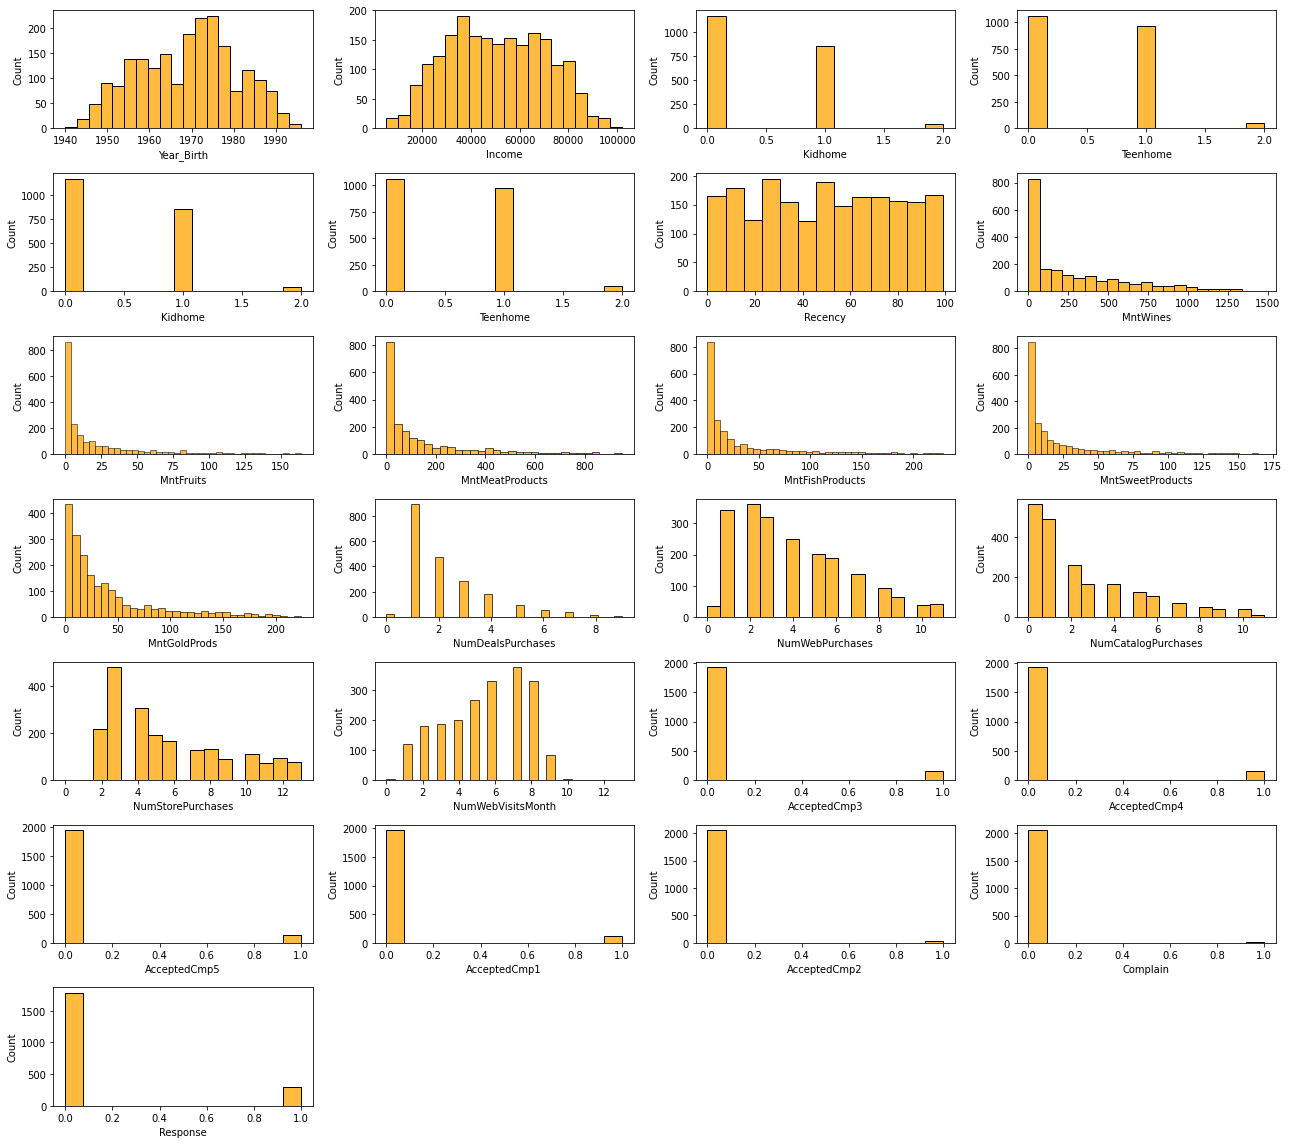

In [51]:
f, axes = plt.subplots(7, 4, figsize=(18, 16))
#sns.despine(left=True)

sns.histplot(data_p['Year_Birth'], color='orange', ax=axes[0, 0])
sns.histplot(data_p['Income'], color='orange', ax=axes[0, 1])
sns.histplot(data_p['Kidhome'], color='orange', ax=axes[0, 2])
sns.histplot(data_p['Teenhome'], color='orange', ax=axes[0, 3])
sns.histplot(data_p['Kidhome'], color='orange', ax=axes[1, 0])
sns.histplot(data_p['Teenhome'], color='orange', ax=axes[1, 1])
sns.histplot(data_p['Recency'], color='orange', ax=axes[1, 2])
sns.histplot(data_p['MntWines'], color='orange', ax=axes[1, 3])
sns.histplot(data_p['MntFruits'], color='orange', ax=axes[2, 0])
sns.histplot(data_p['MntMeatProducts'], color='orange', ax=axes[2, 1])
sns.histplot(data_p['MntFishProducts'], color='orange', ax=axes[2, 2])
sns.histplot(data_p['MntSweetProducts'], color='orange', ax=axes[2, 3])
sns.histplot(data_p['MntGoldProds'], color='orange', ax=axes[3, 0])
sns.histplot(data_p['NumDealsPurchases'], color='orange', ax=axes[3, 1])
sns.histplot(data_p['NumWebPurchases'], color='orange', ax=axes[3, 2])
sns.histplot(data_p['NumCatalogPurchases'], color='orange', ax=axes[3, 3])
sns.histplot(data_p['NumStorePurchases'], color='orange', ax=axes[4, 0])
sns.histplot(data_p['NumWebVisitsMonth'], color='orange', ax=axes[4, 1])
sns.histplot(data_p['AcceptedCmp3'], color='orange', ax=axes[4, 2], kde_kws = {'bw' : 0.1})
sns.histplot(data_p['AcceptedCmp4'], color='orange', ax=axes[4, 3], kde_kws = {'bw' : 0.1})
sns.histplot(data_p['AcceptedCmp5'], color='orange', ax=axes[5, 0], kde_kws = {'bw' : 0.1})
sns.histplot(data_p['AcceptedCmp1'], color='orange', ax=axes[5, 1], kde_kws = {'bw' : 0.1})
sns.histplot(data_p['AcceptedCmp2'], color='orange', ax=axes[5, 2], kde_kws = {'bw' : 0.1})
sns.histplot(data_p['Complain'], color='orange', ax=axes[5, 3], kde_kws = {'bw' : 0.1})
sns.histplot(data_p['Response'], color='orange', ax=axes[6, 0], kde_kws = {'bw' : 0.1})

f.delaxes(ax=axes[6, 1])
f.delaxes(ax=axes[6, 2])
f.delaxes(ax=axes[6, 3])

#plt.setp(axes, yticks=[])
#plt.setp(axes, xticks=[])
plt.tight_layout()

## 5. Basic statistics
[Return to Table of Contents](#Table-of-Contents)

In [52]:
data_p.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2079.000000,2079.000000,2079.000000,2079.000000,2079.000000,2079.000000,2079.000000,2079.000000,2079.000000,2079.000000,2079.000000,2079.000000,2079.000000,2079.000000,2079.000000,2079.000000,2079.000000,2079.000000,2079.000000,2079.000000,2079.000000,2079.000000,2079.000000,2079.000000
mean,5599.651756,1968.996633,50587.468013,0.457431,0.511785,49.271765,294.023088,23.170755,152.467051,33.506494,23.530063,40.367484,2.270322,4.006734,2.486772,5.732083,5.389129,0.073112,0.072631,0.066378,0.055315,0.012987,0.009620,0.143819
std,3245.845992,11.660768,20080.516748,0.540907,0.543339,28.853363,333.923851,34.643214,205.330208,48.944153,35.149412,46.448919,1.626015,2.618685,2.668335,3.203386,2.249820,0.260383,0.259592,0.249002,0.228649,0.113245,0.097632,0.350991
min,1.000000,1940.000000,5305.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2827.500000,1959.500000,34596.000000,0.000000,0.000000,24.500000,22.000000,1.000000,15.000000,2.000000,1.000000,8.000000,1.000000,2.000000,0.000000,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5519.000000,1970.000000,49681.000000,0.000000,0.000000,50.000000,162.000000,7.000000,60.000000,11.000000,8.000000,23.000000,2.000000,3.000000,1.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8423.500000,1977.500000,66658.500000,1.000000,1.000000,74.000000,489.000000,28.000000,211.500000,43.000000,30.000000,52.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,101970.000000,2.000000,2.000000,99.000000,1478.000000,164.000000,951.000000,229.000000,169.000000,224.000000,9.000000,11.000000,11.000000,13.000000,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Correlação entre as variáveis:


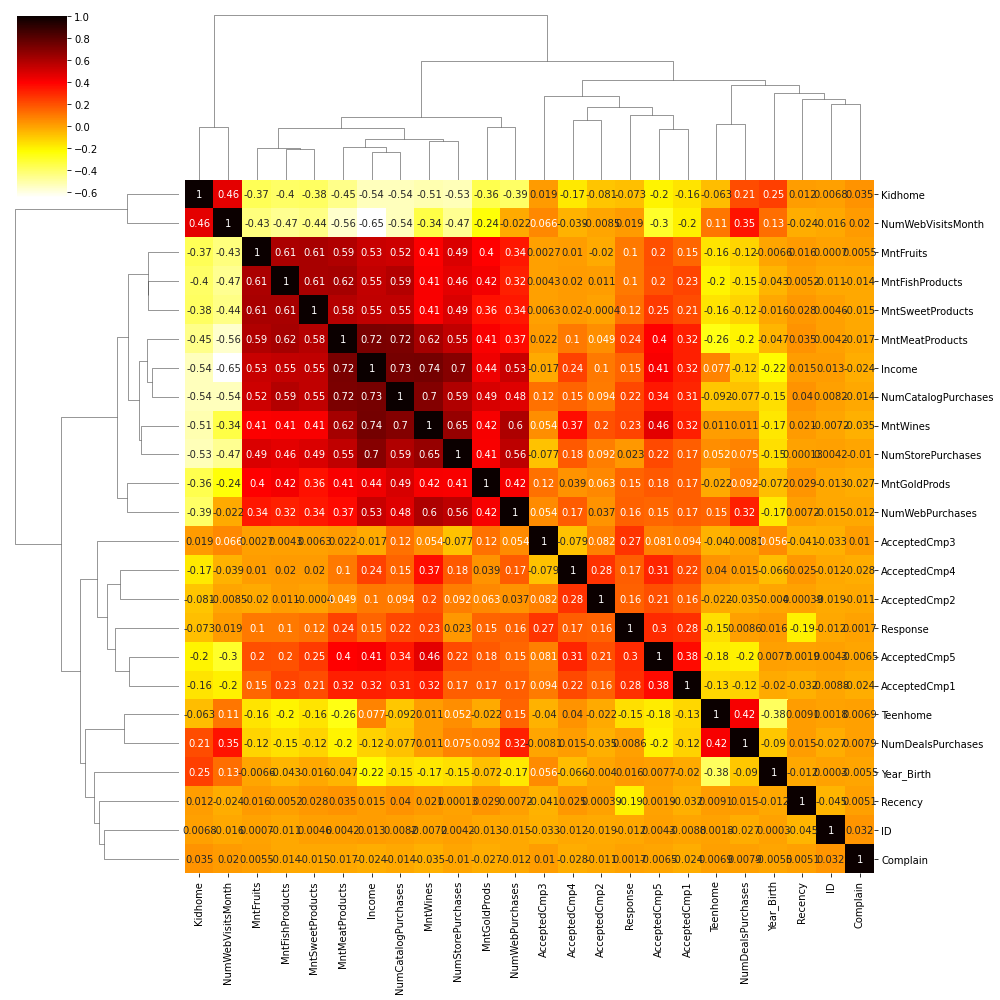

In [53]:
print('Correlação entre as variáveis:')
corr = data_p.corr()
sns.clustermap(corr, cmap='hot_r', annot = True, figsize=(14, 14))

## 6. Visualizations
[Return to Table of Contents](#Table-of-Contents)

### 6.1 Sociodemographic
[Return to Table of Contents](#Table-of-Contents)

In [54]:
def plot_percentage(var, data):
    plt.figure(figsize=(8, 6))
    
    ax = sns.countplot(x=var, data=data, orient='h', palette='hot', order=data[var].value_counts().index)
    ax.set_ylabel('Count', fontsize=10)
    ax.set_title(var, fontsize=15)
    sizes = []
    
    for p in ax.patches:
        height = p.get_height()
        sizes.append(height)
        ax.text(p.get_x() + p.get_width()/1.6, 
                height + 6,
               '{:1.2f}%'.format(height/len(data)*100),
               ha = 'center', va = 'bottom',
               fontsize=12)

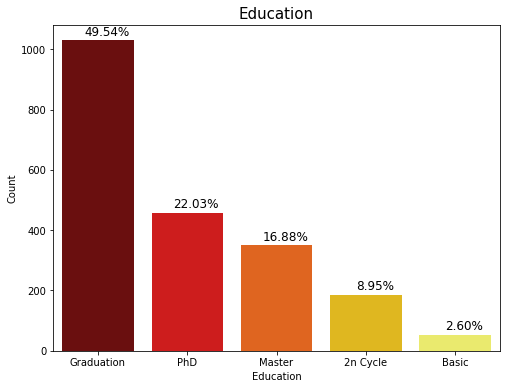

In [55]:
plot_percentage('Education', data_p)

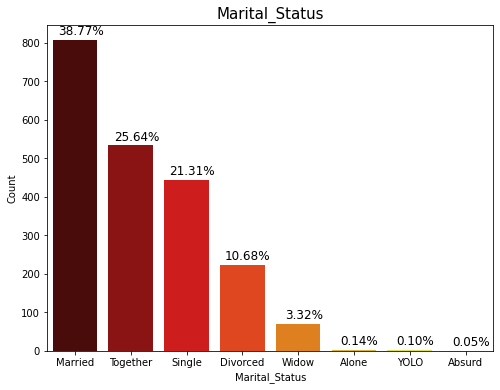

In [56]:
plot_percentage('Marital_Status', data_p)

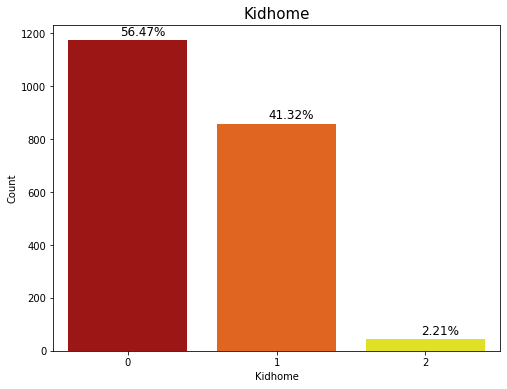

In [57]:
plot_percentage('Kidhome', data_p)

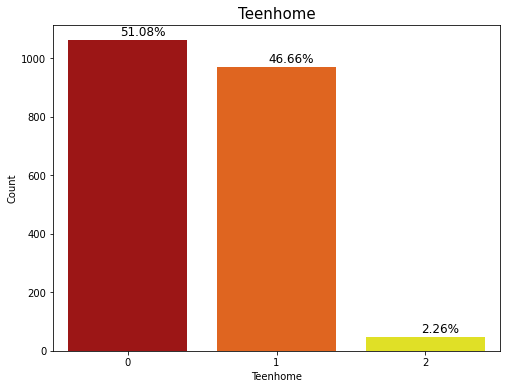

In [58]:
plot_percentage('Teenhome', data_p)

In [59]:
# create year_birth dataframe
year_birth = pd.DataFrame(data_p['Year_Birth'].copy(), columns =['Year_Birth']) 

# create range
year_birth['Year_Birth_range'] = pd.cut(year_birth['Year_Birth'], bins=4, precision=0)

# counts
year_birth[['Year_Birth_range']].value_counts()

Year_Birth_range
(1968.0, 1982.0]    864
(1954.0, 1968.0]    640
(1940.0, 1954.0]    289
(1982.0, 1996.0]    286
dtype: int64

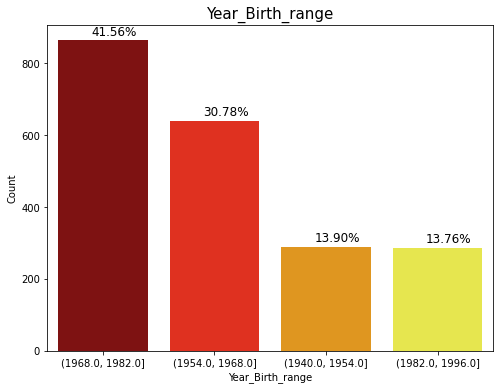

In [60]:
plot_percentage('Year_Birth_range', year_birth)

In [61]:
# create income dataframe
income = pd.DataFrame(data_p['Income'].copy(), columns =['Income']) 

# column salário mínimo == 1100
income['Minimum_Wage'] = round(income['Income'] / 1100)

# create interval range
interval_range = pd.interval_range(start=0, freq=25, end=100, closed='right')
income['Minimum_Wage_interval_range'] =  pd.cut(income['Minimum_Wage'], bins=interval_range, labels=[1,2,3,4])

# counts
income[['Minimum_Wage_interval_range']].value_counts()

Minimum_Wage_interval_range
(25, 50]                       904
(50, 75]                       769
(0, 25]                        310
(75, 100]                       96
dtype: int64

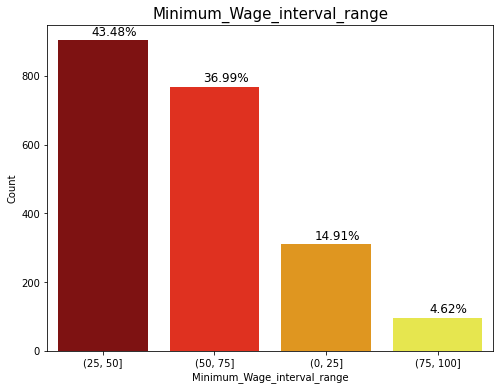

In [62]:
plot_percentage('Minimum_Wage_interval_range', income)

### 6.2 Amounts
[Return to Table of Contents](#Table-of-Contents)

In [63]:
# create amount dataframe
amount = data_p.iloc[:, 9:15].copy()

# create range
columns = amount.columns
for c in columns:
    amount[c + '_range'] = pd.cut(amount[c], bins=4, precision=0)
    
# counts
count_columns = ['MntWines_range','MntFruits_range','MntMeatProducts_range','MntFishProducts_range',
                 'MntSweetProducts_range','MntGoldProds_range']
for s in count_columns:
    print(amount[[s]].value_counts())
    print(' ')

MntWines_range  
(-1.0, 370.0]       1399
(370.0, 739.0]       419
(739.0, 1108.0]      200
(1108.0, 1478.0]      61
dtype: int64
 
MntFruits_range
(-0.0, 41.0]       1681
(41.0, 82.0]        230
(82.0, 123.0]        99
(123.0, 164.0]       69
dtype: int64
 
MntMeatProducts_range
(-1.0, 238.0]            1613
(238.0, 476.0]            273
(476.0, 713.0]            118
(713.0, 951.0]             75
dtype: int64
 
MntFishProducts_range
(-0.0, 57.0]             1644
(57.0, 114.0]             245
(114.0, 172.0]            121
(172.0, 229.0]             69
dtype: int64
 
MntSweetProducts_range
(-0.0, 42.0]              1685
(42.0, 84.0]               217
(84.0, 127.0]              113
(127.0, 169.0]              64
dtype: int64
 
MntGoldProds_range
(-0.0, 56.0]          1602
(56.0, 112.0]          277
(112.0, 168.0]         131
(168.0, 224.0]          69
dtype: int64
 


Text(0.5, 0.98, 'Amounts')

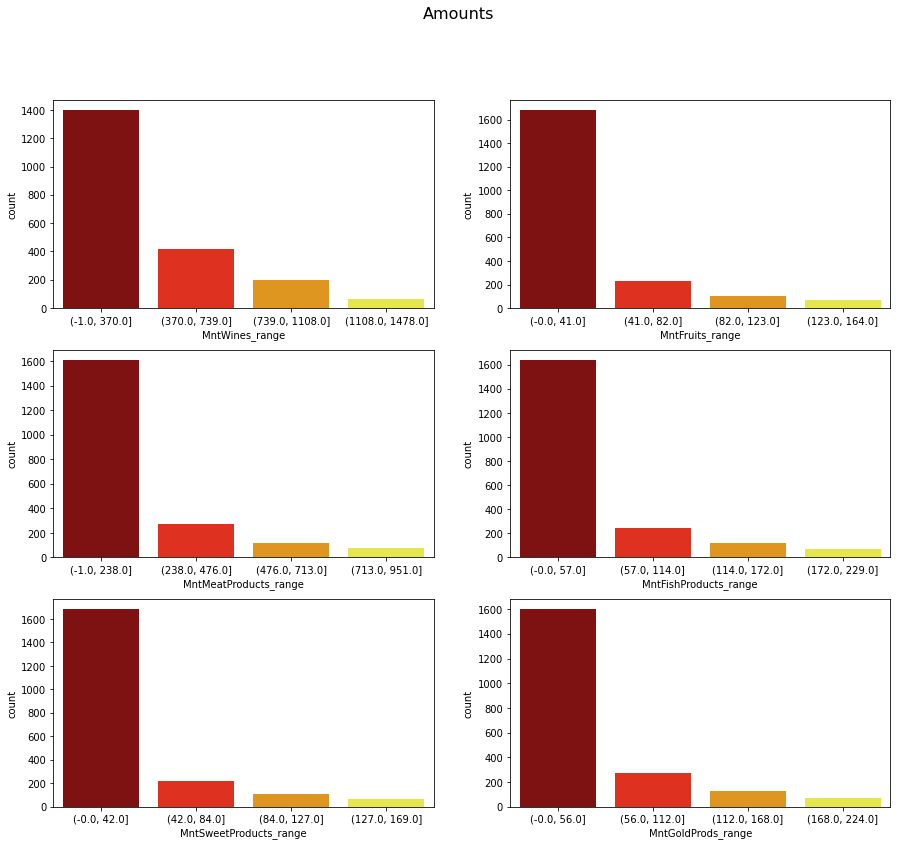

In [64]:
f, axes = plt.subplots(3, 2, figsize=(15, 13))
#sns.despine(left=True)

sns.countplot(x='MntWines_range', data=amount, orient='h', palette='hot', order=amount['MntWines_range'].value_counts().index, ax=axes[0, 0])
sns.countplot(x='MntFruits_range', data=amount, orient='h', palette='hot', order=amount['MntFruits_range'].value_counts().index, ax=axes[0, 1])
sns.countplot(x='MntMeatProducts_range', data=amount, orient='h', palette='hot', order=amount['MntMeatProducts_range'].value_counts().index, ax=axes[1, 0])
sns.countplot(x='MntFishProducts_range', data=amount, orient='h', palette='hot', order=amount['MntFishProducts_range'].value_counts().index, ax=axes[1, 1])
sns.countplot(x='MntSweetProducts_range', data=amount, orient='h', palette='hot', order=amount['MntSweetProducts_range'].value_counts().index, ax=axes[2, 0])
sns.countplot(x='MntGoldProds_range', data=amount, orient='h', palette='hot', order=amount['MntGoldProds_range'].value_counts().index, ax=axes[2, 1])

f.suptitle('Amounts', fontsize=16)

#plt.setp(axes, yticks=[])
#plt.setp(axes, xticks=[])
#plt.tight_layout()

### 6.3 Purchases
[Return to Table of Contents](#Table-of-Contents)

Text(0.5, 0.98, 'Purchases made')

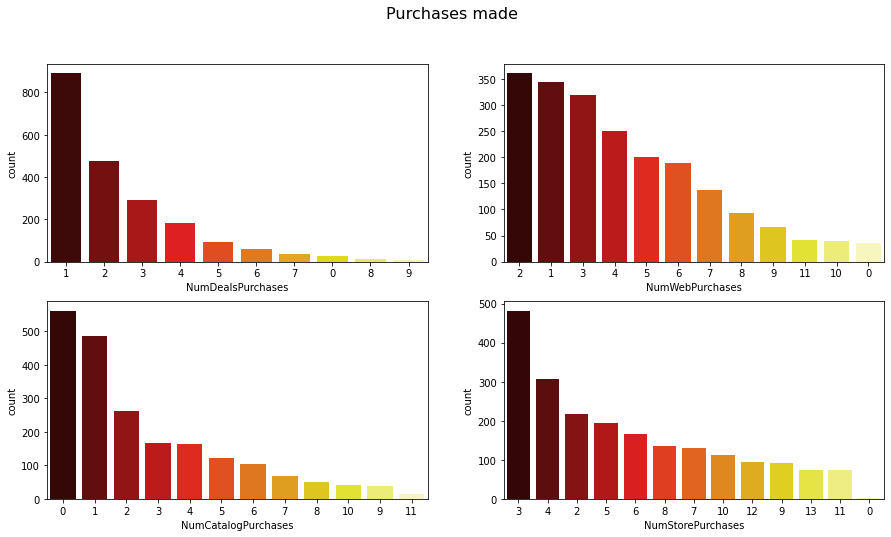

In [65]:
f, axes = plt.subplots(2, 2, figsize=(15, 8))
#sns.despine(left=True)

sns.countplot(x='NumDealsPurchases', data=data_p, orient='h', palette='hot', order=data_p['NumDealsPurchases'].value_counts().index, ax=axes[0, 0])
sns.countplot(x='NumWebPurchases', data=data_p, orient='h', palette='hot', order=data_p['NumWebPurchases'].value_counts().index, ax=axes[0, 1])
sns.countplot(x='NumCatalogPurchases', data=data_p, orient='h', palette='hot', order=data_p['NumCatalogPurchases'].value_counts().index, ax=axes[1, 0])
sns.countplot(x='NumStorePurchases', data=data_p, orient='h', palette='hot', order=data_p['NumStorePurchases'].value_counts().index, ax=axes[1, 1])

f.suptitle('Purchases made', fontsize=16)

#plt.setp(axes, yticks=[])
#plt.setp(axes, xticks=[])
#plt.tight_layout()

### 6.4 Accepted campaign
[Return to Table of Contents](#Table-of-Contents)

Text(0.5, 0.98, '1 if costumer accepted the offer in the campaign, 0 otherwise')

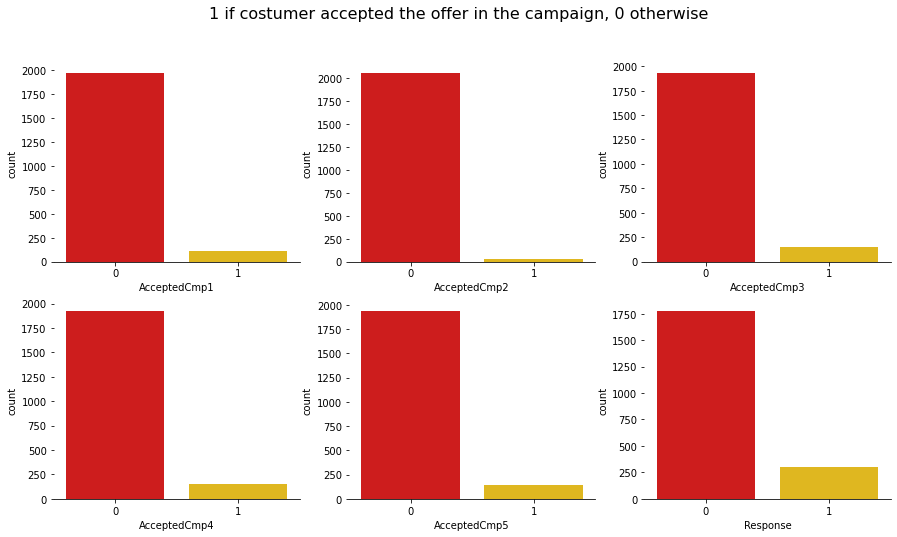

In [66]:
f, axes = plt.subplots(2, 3, figsize=(15, 8))
sns.despine(left=True)

sns.countplot(x='AcceptedCmp1', data=data_p, orient='h', palette='hot', ax=axes[0, 0])# 1st campaign
sns.countplot(x='AcceptedCmp2', data=data_p, orient='h', palette='hot', ax=axes[0, 1])# 2st campaign
sns.countplot(x='AcceptedCmp3', data=data_p, orient='h', palette='hot', ax=axes[0, 2])# 3st campaign
sns.countplot(x='AcceptedCmp4', data=data_p, orient='h', palette='hot', ax=axes[1, 0])# 4st campaign
sns.countplot(x='AcceptedCmp5', data=data_p, orient='h', palette='hot', ax=axes[1, 1])# 5st campaign
sns.countplot(x='Response', data=data_p, orient='h', palette='hot', ax=axes[1, 2])    # last campaign

f.suptitle('1 if costumer accepted the offer in the campaign, 0 otherwise', fontsize=16)

#plt.setp(axes, yticks=[])
#plt.setp(axes, xticks=[])
#plt.tight_layout()

## 7. RFM model
[Return to Table of Contents](#Table-of-Contents)

**Recency** – how recently a customer bought

**Frequency** – how frequently a customer bought

**Monetary** – how much money a customer spent

Source: https://en.wikipedia.org/wiki/RFM_(market_research)

### 7.1 Recency
[Return to Table of Contents](#Table-of-Contents)

In [67]:
# Within Cluster Sum of Squares (WCSS)
from sklearn.cluster import KMeans

def calculate_wcss(df):
    wcss = []
    for k in range(1, 10): # n clusters tested
        kmeans = KMeans(n_clusters = k)
        kmeans.fit(X=df)
        df['Clusters'] = kmeans.labels_
        wcss.append(kmeans.inertia_)
    return wcss

In [68]:
# create dataset
df_recency = data_p[['Recency']].copy()
df_recency.head()

,Recency
0,58
1,38
2,26
3,26
4,94


In [69]:
# Inertia
sum_squares_recency = calculate_wcss(df_recency)
sum_squares_recency

[1729969.4526214525,
 438994.12248833943,
 190886.2256446044,
 111041.98359126113,
 67681.52421339675,
 49094.80201090822,
 37025.82474015952,
 28687.541610700402,
 22107.10481546846]

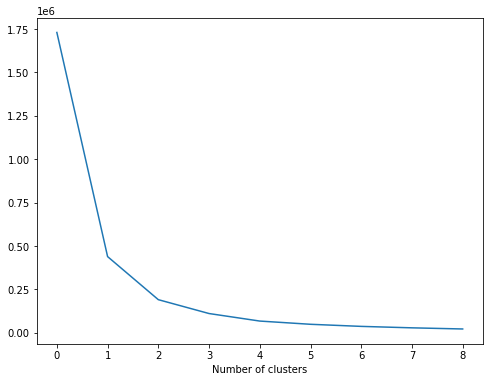

In [70]:
# Elbow method
plt.figure(figsize=(8,6))
plt.plot(sum_squares_recency)
plt.xlabel('Number of clusters')
plt.show()

**Math method**

#**Formula that calculates the distance between a point and a line**

\begin{equation*}

distande(P0,P1,(x,y)) = \frac{|(y1 - y0)x - (x1 - x0)y + x1y0 - y1x0|}{(y1 - y0)² + (x1 - xo)²}

\end{equation*}

In [71]:
# Math rule
## determine the ideal number of clusters by calculating the longest distance from the line
import math

def optimal_n_clusters(wcss):
    
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss) - 1]
    
    distance = []
    for i in range(len(wcss)):
        x0 = i + 2
        y0 = wcss[i]
        numerator = abs((y2 - y1) * x0 - (x2 - x1) * y0 + x2 * y1 - y2 * x1)
        denominator = math.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distance.append(numerator / denominator)
        
    return distance.index(max(distance)) + 2

In [72]:
n_recency = optimal_n_clusters(sum_squares_recency)
n_recency

4

In [73]:
# copy dataset
data_clusters = data_p.copy()
#data_clusters.shape

In [74]:
# create Recency_cluster column
kmeans = KMeans(n_clusters=4)

data_clusters['Recency_cluster'] = kmeans.fit_predict(df_recency)
data_clusters['Recency_cluster'].head()

0    2
1    3
2    3
3    3
4    0
Name: Recency_cluster, dtype: int32

In [75]:
# function to clustering

def order_cluster(cluster_name, target_name, df, order):
    # group by mean
    grouping_by_cluster = df.groupby(cluster_name)[target_name].mean().reset_index()
    # order by cluster
    grouping_by_cluster_ordered = grouping_by_cluster.sort_values(by=target_name, ascending=order).reset_index(drop=True)
    # create ordered cluster
    grouping_by_cluster_ordered['index'] = grouping_by_cluster_ordered.index
    # add cluster colum to dataset
    joining_clusters = pd.merge(df, grouping_by_cluster_ordered[[cluster_name, 'index']], on=cluster_name)
    # delete cluster unordered
    remove_column = joining_clusters.drop(cluster_name, axis=1)
    # rename column
    data_rfm = remove_column.rename(columns={'index':cluster_name})
    return data_rfm

In [76]:
# apply function
data_clusters = order_cluster('Recency_cluster', 'Recency', data_clusters, False)

# average with the highest Recency gets 0, with the lowest gets 3
data_clusters.groupby('Recency_cluster')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
Recency_cluster,,,,,,,,
0,608.0,84.559211,8.443813,71.0,77.0,84.0,92.0,99.0
1,549.0,56.938069,7.417908,45.0,51.0,56.0,64.0,70.0
2,468.0,32.465812,6.438052,22.0,27.0,32.0,38.0,44.0
3,454.0,10.068282,6.284443,0.0,4.0,10.0,15.0,21.0


### 7.2 Frequency
[Return to Table of Contents](#Table-of-Contents)

In [77]:
# create dataset
df_frequency = data_p[['ID', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].copy()

# sum all purchases
df_frequency['TotalPurchases'] = df_frequency[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

# drop columns
df_frequency = df_frequency.drop(columns=['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'])

df_frequency.head()

,ID,TotalPurchases
0,5524,25
1,2174,6
2,4141,21
3,6182,8
4,5324,19


In [78]:
# merge 
data_clusters = pd.merge(data_clusters, df_frequency, on='ID')

df_frequency = data_clusters[['TotalPurchases']]

# create Frequency_cluster column
kmeans = KMeans(n_clusters=4)
data_clusters['Frequency_cluster'] = kmeans.fit_predict(df_frequency)
data_clusters.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Recency_cluster,TotalPurchases,Frequency_cluster
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1,25,2
1,387,1976,Basic,Married,7500.0,0,0,2012-11-13,59,6,16,11,11,1,16,1,2,0,3,8,0,0,0,0,0,0,0,1,6,1
2,8180,1952,Master,Divorced,59354.0,1,1,2013-11-15,53,233,2,53,3,5,14,3,6,1,5,6,0,0,0,0,0,0,0,1,15,3
3,9736,1980,Graduation,Married,41850.0,1,1,2012-12-24,51,53,5,19,2,13,4,3,3,0,3,8,0,0,0,0,0,0,0,1,9,1
4,1993,1949,PhD,Married,58607.0,0,1,2012-12-23,63,867,0,86,0,0,19,3,2,3,9,8,0,1,0,0,0,0,0,1,17,0


In [79]:
data_clusters.groupby('Frequency_cluster')['TotalPurchases'].describe()

,count,mean,std,min,25%,50%,75%,max
Frequency_cluster,,,,,,,,
0,618.0,18.906149,2.033176,16.0,17.0,19.0,21.0,22.0
1,731.0,6.325581,1.657904,1.0,5.0,6.0,8.0,9.0
2,361.0,25.728532,2.523994,23.0,24.0,25.0,27.0,35.0
3,369.0,12.306233,1.772676,10.0,11.0,12.0,14.0,15.0


In [80]:
# apply function
data_clusters = order_cluster('Frequency_cluster', 'TotalPurchases', data_clusters, True)

# average with the highest TotalPurchases gets 3, with the lowest gets 0
data_clusters.groupby('Frequency_cluster')['TotalPurchases'].describe()

,count,mean,std,min,25%,50%,75%,max
Frequency_cluster,,,,,,,,
0,731.0,6.325581,1.657904,1.0,5.0,6.0,8.0,9.0
1,369.0,12.306233,1.772676,10.0,11.0,12.0,14.0,15.0
2,618.0,18.906149,2.033176,16.0,17.0,19.0,21.0,22.0
3,361.0,25.728532,2.523994,23.0,24.0,25.0,27.0,35.0


### 7.3 Monetary 
[Return to Table of Contents](#Table-of-Contents)

In [81]:
# create dataset
df_monetary = data_p[['ID', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].copy()

# sum all purchases
df_monetary['TotalAmount'] = df_monetary[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# drop columns
df_monetary = df_monetary.drop(columns=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'])

df_monetary.head()

,ID,TotalAmount
0,5524,1617
1,2174,27
2,4141,776
3,6182,53
4,5324,422


In [82]:
# merge 
data_clusters = pd.merge(data_clusters, df_monetary, on='ID')

df_monetary = data_clusters[['TotalAmount']]

# create Amount_cluster column
kmeans = KMeans(n_clusters=4)
data_clusters['Monetary_cluster'] = kmeans.fit_predict(df_monetary)
data_clusters.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Recency_cluster,TotalPurchases,Frequency_cluster,TotalAmount,Monetary_cluster
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1,25,3,1617,3
1,2968,1943,PhD,Divorced,48948.0,0,0,2013-02-01,53,437,8,206,160,49,42,2,7,10,5,6,1,0,0,0,0,0,1,1,24,3,902,1
2,9381,1978,Graduation,Married,66373.0,1,1,2013-06-12,57,328,9,124,12,24,109,7,4,2,10,3,0,0,0,0,0,0,0,1,23,3,606,2
3,6260,1955,Master,Together,82384.0,0,0,2012-11-19,55,984,51,432,180,120,190,1,3,10,13,1,0,0,1,0,0,0,1,1,27,3,1957,3
4,2683,1969,Graduation,Married,52413.0,0,2,2013-02-02,56,295,106,271,75,98,65,4,6,4,12,6,0,0,0,0,0,0,0,1,26,3,910,1


In [83]:
data_clusters.groupby('Monetary_cluster')['TotalAmount'].describe()

,count,mean,std,min,25%,50%,75%,max
Monetary_cluster,,,,,,,,
0,1042.0,100.281190,85.041091,8.0,39.00,66.0,138.00,331.0
1,404.0,1097.450495,159.390106,832.0,966.75,1088.5,1215.00,1416.0
2,398.0,560.859296,143.746016,332.0,433.25,544.0,683.75,825.0
3,235.0,1735.502128,243.332936,1427.0,1538.00,1677.0,1894.00,2525.0


In [84]:
# apply function
data_clusters = order_cluster('Monetary_cluster', 'TotalAmount', data_clusters, True)

# average with the highest TotalAmount gets 3, with the lowest gets 0
data_clusters.groupby('Monetary_cluster')['TotalAmount'].describe()

,count,mean,std,min,25%,50%,75%,max
Monetary_cluster,,,,,,,,
0,1042.0,100.281190,85.041091,8.0,39.00,66.0,138.00,331.0
1,398.0,560.859296,143.746016,332.0,433.25,544.0,683.75,825.0
2,404.0,1097.450495,159.390106,832.0,966.75,1088.5,1215.00,1416.0
3,235.0,1735.502128,243.332936,1427.0,1538.00,1677.0,1894.00,2525.0


In [85]:
data_clusters.sample(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Recency_cluster,TotalPurchases,Frequency_cluster,TotalAmount,Monetary_cluster
550,2631,1982,Graduation,Together,71853.0,0,0,2013-05-08,29,358,108,413,141,97,32,1,2,8,6,1,0,0,0,0,0,0,0,2,17,2,1149,2
177,6988,1986,Graduation,Married,71952.0,1,0,2013-01-10,93,656,80,455,52,107,93,2,8,4,8,4,1,0,1,0,0,0,0,0,22,2,1443,3
1645,7444,1969,Master,Married,42169.0,1,1,2013-10-19,20,19,0,9,0,0,2,2,1,0,3,8,0,0,0,0,0,0,0,3,6,0,30,0


### 7.4 Score 
[Return to Table of Contents](#Table-of-Contents)

In [86]:
# sum all clusters points
data_clusters['Score'] = data_clusters[['Recency_cluster', 'Frequency_cluster', 'Monetary_cluster']].sum(axis=1)
data_clusters.sample(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Recency_cluster,TotalPurchases,Frequency_cluster,TotalAmount,Monetary_cluster,Score
2023,7494,1950,PhD,Divorced,42873.0,1,1,2013-01-21,11,209,0,40,3,2,15,4,6,1,4,8,0,0,0,0,0,0,0,3,15,1,269,0,4
2078,2452,1971,Graduation,Together,34600.0,1,1,2013-01-01,8,199,33,60,8,3,15,5,5,2,5,8,0,0,0,0,0,0,1,3,17,2,318,0,5
403,5682,1953,PhD,Single,64108.0,0,1,2013-03-23,8,948,10,86,13,21,21,4,6,9,11,5,0,0,0,0,0,0,0,3,30,3,1099,2,8


In [87]:
# minimum and maximum points
print(f"Minimum score: { data_clusters['Score'].min() }.")
print(f"Maximum score: { data_clusters['Score'].max() }.")

Minimum score: 0.
Maximum score: 9.


In [88]:
# create segments: 0 (iron); 1 - 2 (bronze); 3 - 5 (silver); 6 - 8 (gold); 9 - 10 (platinum)
cut_labels_4 = ['iron','bronze', 'silver', 'gold', 'platinum']
cut_bins = [-1, 0, 2, 5, 8, 10]
data_clusters['Segment'] = pd.cut(data_clusters['Score'], bins=cut_bins, labels=cut_labels_4)
data_clusters[['Score','Segment']].sample(5)

,Score,Segment
570,4,silver
332,7,gold
926,3,silver
704,7,gold
289,6,gold


In [89]:
data_clusters.query('Score == 0').max()

ID                          11188
Year_Birth                   1996
Education                     PhD
Marital_Status              Widow
Income                      62307
Kidhome                         2
Teenhome                        2
Dt_Customer            2014-06-26
Recency                        99
MntWines                      144
MntFruits                      36
MntMeatProducts                66
MntFishProducts                34
MntSweetProducts               30
MntGoldProds                   61
NumDealsPurchases               3
NumWebPurchases                 4
NumCatalogPurchases             2
NumStorePurchases               4
NumWebVisitsMonth              10
AcceptedCmp3                    1
AcceptedCmp4                    0
AcceptedCmp5                    0
AcceptedCmp1                    0
AcceptedCmp2                    0
Complain                        1
Response                        1
Recency_cluster                 0
TotalPurchases                  9
Frequency_clus

In [90]:
# maximum date of customer's enrollment with the company
data_clusters['Dt_Customer'].max()

'2014-06-29'

☝🏼 Client with recent enrollment date in the company did not have enough time to engage. 

### 7.5 Visualizations 
[Return to Table of Contents](#Table-of-Contents)

In [91]:
def plot_segments(x, y, df):
    sns.set(palette='muted', color_codes=True, style='whitegrid')
    plt.figure(figsize=[10, 8])
    sns.scatterplot(x=x, y=y, hue='Segment', data=df, size='Segment', sizes=(50, 200), size_order=['platinum', 'gold', 'silver', 'bronze', 'iron'])
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

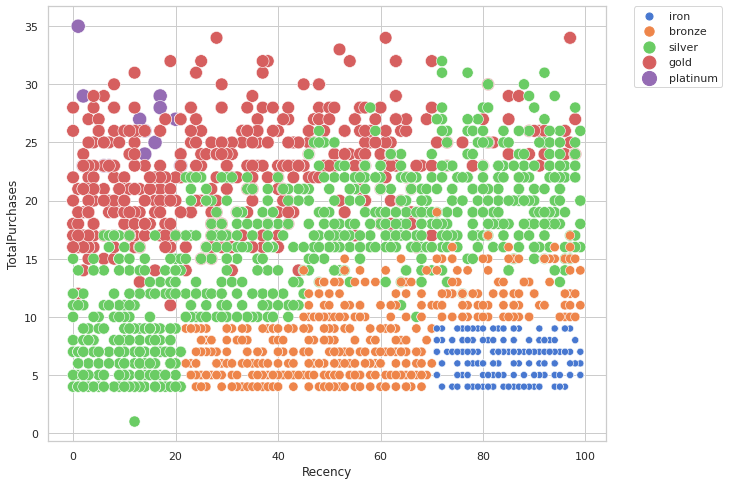

In [92]:
plot_segments('Recency', 'TotalPurchases', data_clusters)

💡 The 'platinum' customers have a few days since the last purchase (they are more regular) and have made larger purchases. The 'gold' customers come next in total purchases but have a greater variation in recency time.

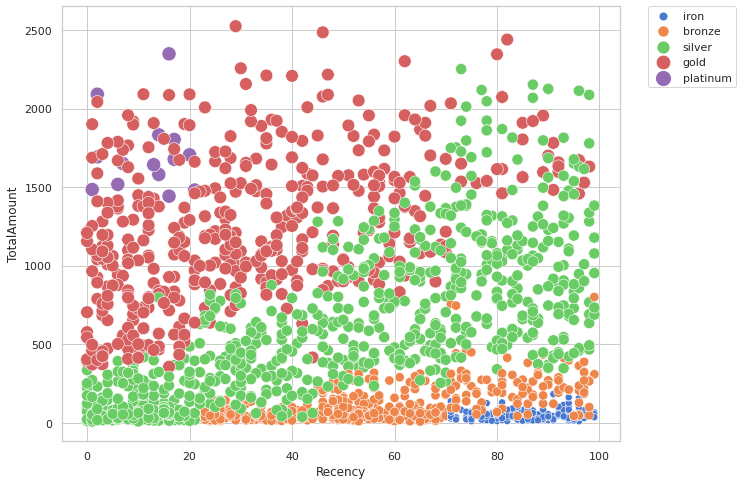

In [93]:
plot_segments('Recency', 'TotalAmount', data_clusters)

💡 The 'gold' customers compete in spending volume with 'platinum' customers but have different recency (total days since last purchase).

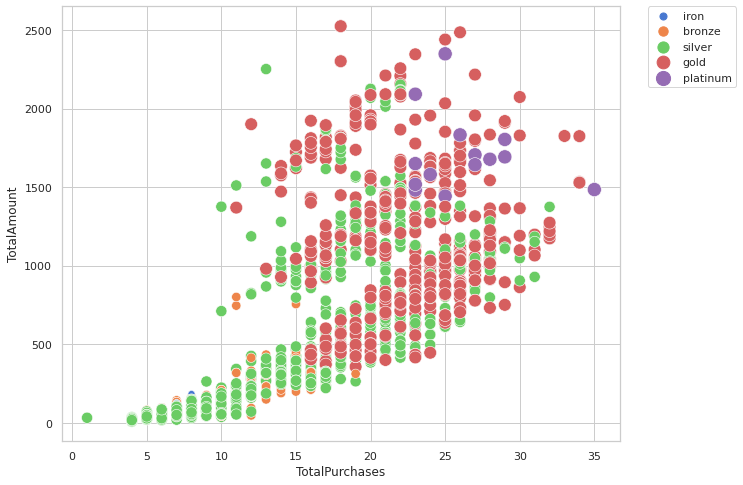

In [94]:
plot_segments('TotalPurchases', 'TotalAmount', data_clusters)

💡 Cross-referencing total purchases with total spending, "gold" customers outnumber "platinum" customers. Silver customers are next, but have a higher presence in total purchases and lower spending.

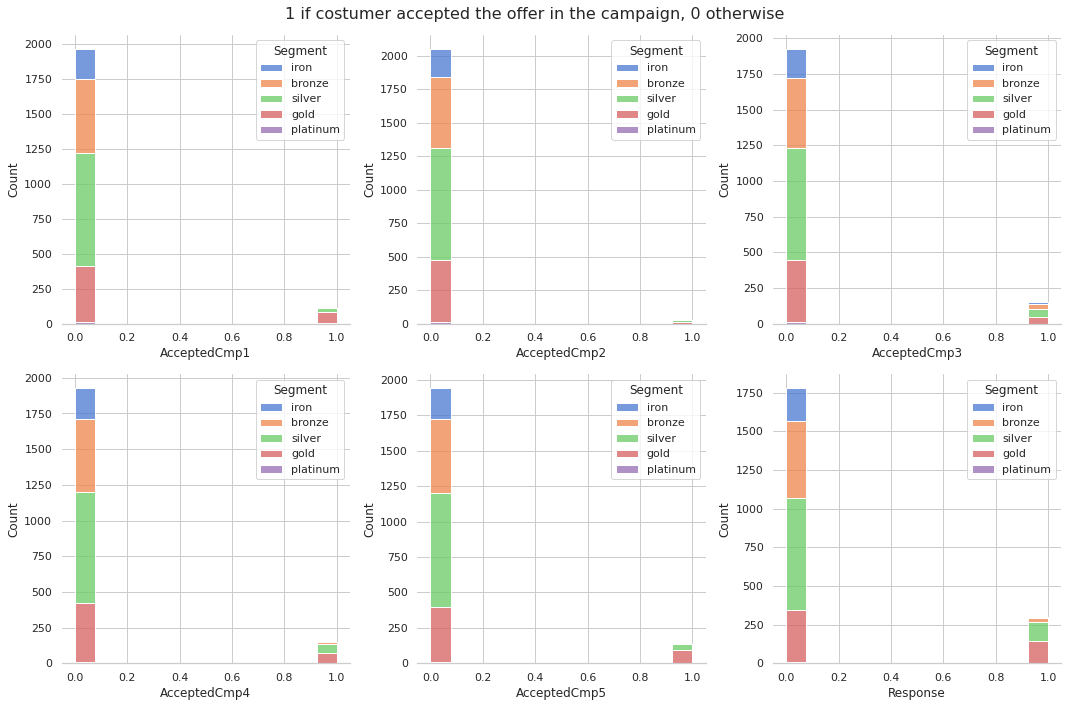

In [95]:
f, axes = plt.subplots(2, 3, figsize=(15, 10))
sns.despine(left=True)

sns.histplot(data=data_clusters, x="AcceptedCmp1", hue="Segment", multiple="stack", ax=axes[0, 0])
sns.histplot(data=data_clusters, x="AcceptedCmp2", hue="Segment", multiple="stack", ax=axes[0, 1])
sns.histplot(data=data_clusters, x="AcceptedCmp3", hue="Segment", multiple="stack", ax=axes[0, 2])
sns.histplot(data=data_clusters, x="AcceptedCmp4", hue="Segment", multiple="stack", ax=axes[1, 0])
sns.histplot(data=data_clusters, x="AcceptedCmp5", hue="Segment", multiple="stack", ax=axes[1, 1])
sns.histplot(data=data_clusters, x="Response", hue="Segment", multiple="stack", ax=axes[1, 2])

f.suptitle('1 if costumer accepted the offer in the campaign, 0 otherwise', fontsize=16)

#plt.setp(axes, yticks=[])
#plt.setp(axes, xticks=[])
plt.tight_layout()

💡 The campaign with the best acceptance was 6th (Response). The worst was campaign 2. 

💡 Except for campaign 2, the "gold" segment is the one that responded best to the campaigns.

💡 Campaign 3 managed to attract different segments, even if in smaller numbers.

### 7.6 Numbers
[Return to Table of Contents](#Table-of-Contents)

In [96]:
data_clusters.groupby('Segment').agg({'Recency': ['mean','sum'], 'TotalPurchases': ['mean','sum'], 'TotalAmount': ['mean','sum'], 'Score': ['mean','count']})

Recency        TotalPurchases         TotalAmount          \
               mean    sum           mean    sum         mean     sum   
Segment                                                                 
iron      84.274419  18119       6.432558   1383    59.790698   12855   
bronze    54.668561  28865       8.291667   4378   109.854167   58003   
silver    46.989311  39565      15.669834  13194   582.097387  490126   
gold      32.752083  15721      22.531250  10815  1237.472917  593987   
platinum  11.857143    166      26.214286    367  1711.214286   23957   

             Score        
              mean count  
Segment                   
iron      0.000000   215  
bronze    1.490530   528  
silver    3.935867   842  
gold      6.706250   480  
platinum  9.000000    14

In [99]:
# Segment proportion / total
data_clusters.groupby('Segment').agg({'Segment': ['count']}) / len(data_clusters)

,Segment
,count
Segment,
iron,0.103415
bronze,0.253968
silver,0.405002
gold,0.230880
platinum,0.006734


In [98]:
# TotalAmount by Segment / TotalAmount
data_clusters.groupby('Segment').agg({'TotalAmount': ['sum']}) / data_clusters['TotalAmount'].sum()

,TotalAmount
,sum
Segment,
iron,0.008839
bronze,0.045357
silver,0.387342
gold,0.529696
platinum,0.028767


💡 The "gold" segment makes up 23% of the customers and represents a total of 53% of earnings.

## 8. Call To Action
[Return to Table of Contents](#Table-of-Contents)

🎬 **Pareto Principle**: 80% of outcomes (or outputs) result from 20% of all causes (or inputs) for any given event. In other words: _80% of business success comes from 20% of customers_. And these customers belong to the "gold" segment.